In [40]:
#Import libraries
import pandas as pd
import unicodecsv
import matplotlib as plt
import numpy as np
import datetime
from pprint import pprint

%matplotlib inline

In [2]:
#Update variable with the file name
transactions_file = '/Users/knico/new-git-project/transaction.csv'


In [18]:
# Convert to pandas dataframe and print a few lines.
df = pd.read_csv(transactions_file)
print(df.head())
    
    

    Order Sale_Date      Type  Store_ID  Transaction_ID  SKU  Quantity  \
0  133429  2/2/2021  Delivery      1666             866  1TS     230.0   
1  132970  2/3/2021  Delivery      4736             624  R6E     372.0   
2  132685  2/4/2021  Delivery      6459             482  IEV     298.0   
3  133327  2/5/2021  Delivery      3719             810  C8Z     466.0   
4  133115  2/6/2021  Delivery      1253             708  8HU     360.0   

   Sales_Amount  Inventory  
0         37.38        156  
1          2.06        253  
2          4.96         82  
3          8.88        453  
4          2.76          8  


In [19]:
#Review data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133635 entries, 0 to 133634
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Order           133635 non-null  int64  
 1   Sale_Date       133635 non-null  object 
 2   Type            133635 non-null  object 
 3   Store_ID        133635 non-null  int64  
 4   Transaction_ID  133635 non-null  int64  
 5   SKU             133635 non-null  object 
 6   Quantity        133635 non-null  float64
 7   Sales_Amount    133635 non-null  float64
 8   Inventory       133635 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 9.2+ MB


In [53]:
def drop_columns(drop_list):
    """Function will drop any unwanted columns"""
    for col_name in drop_list:
        if col_name in df:
            df.drop(labels=col_name,axis=1 , inplace = True)
        else: 
            print(col_name ,"does not exist")
    

In [55]:
# Define list of columns to drop and call the function.
drop_list = ['Order','Transaction_ID']
drop_columns(drop_list)

Order does not exist
Transaction_ID does not exist


In [45]:

def change_var_type(col_as_string, ctype):
    """This function will convert data types"""
    if ctype == 'string':
        #new_type = df[col_as_string].astype("|S")
        new_type = df[col_as_string].astype("string")
    if ctype == 'number':
        new_type = df[col_as_string].astype(int)
    if ctype == 'date':
       new_type = pd.to_datetime(df[col_as_string])
     #   new_type = df[col_as_string].astype(date)
    return new_type

In [49]:
# Call the function to convert the data types. Convert to datetime.
df['Store_ID'] = change_var_type('Store_ID','string')

df['Sale_Date'] = change_var_type('Sale_Date', 'date')


In [56]:
df.describe(include='all')

C:\Users\knico\AppData\Local\Temp/ipykernel_15776/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
C:\Users\knico\AppData\Local\Temp/ipykernel_15776/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Sale_Date,Type,Store_ID,SKU,Quantity,Sales_Amount,Inventory,TEST
count,133635,133635,133635,133635,133635.000000,133635.000000,133635.000000,133635
unique,365,2,30,187,NaN,NaN,NaN,365
top,2021-07-28 00:00:00,Sale,1253,N8U,NaN,NaN,NaN,2021-07-28 00:00:00
freq,415,131706,13636,11088,NaN,NaN,NaN,415
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00
last,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 00:00:00
mean,NaN,NaN,NaN,NaN,7.178220,11.947653,2.796805,NaN
std,NaN,NaN,NaN,NaN,49.274735,19.306320,28.038712,NaN
min,NaN,NaN,NaN,NaN,0.010000,0.020000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,4.230000,0.000000,NaN


In [61]:
#Add up the Sales by Location
data = df.groupby(['Store_ID']).sum()['Sales_Amount']
print(data)

Store_ID
1253    162224.19
1666     65985.15
2065     32484.37
2116     61614.45
2547     32720.51
3071     66979.57
3624     32470.94
3686     31406.65
3719     32253.04
3874     63209.39
4736     99475.75
4776     33977.25
4921     31312.84
5010     34017.36
5058     31949.58
5541     63695.54
5599     65516.98
5780     32727.94
592      65745.46
6044     65677.75
6294     98304.06
6450     32469.71
6459     65061.79
6865     31828.48
7548     65768.94
822      34053.33
8303     33195.44
8566     31618.03
9200     34124.90
9223     64755.21
Name: Sales_Amount, dtype: float64


In [62]:
# View the sales and deliveries by date
date_volume = df.groupby(['Sale_Date','Type']).sum()['Quantity']
print(date_volume)


Sale_Date   Type    
2021-01-01  Delivery    2358.00
            Sale         580.00
2021-01-02  Delivery    3382.00
            Sale         505.67
2021-01-03  Delivery    2092.00
                         ...   
2021-12-28  Sale         501.00
2021-12-29  Sale         437.80
2021-12-30  Sale         526.00
2021-12-31  Delivery     289.00
            Sale         468.00
Name: Quantity, Length: 728, dtype: float64


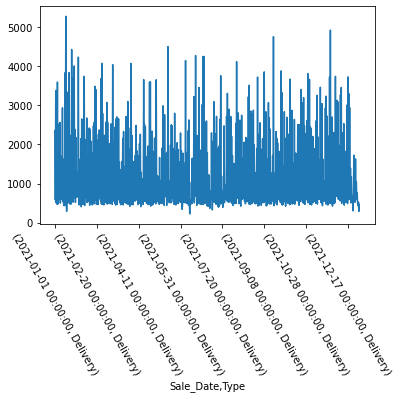

In [63]:
date_volume.plot()
plt.pyplot.xticks(rotation=300)
plt.pyplot.show()


In [64]:
DOS = df.set_index('Sale_Date')
DOS.index = pd.to_datetime(DOS.index)
print("No Sales on These dates")
k = pd.date_range(start='2021-12-31', end = '2022-03-31').difference(DOS.index);
pprint(k)

No Sales on These dates
DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
               '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
               '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-2

In [89]:
def customer_df(df, customer_number):
    
    customer_df = df[df['Store_ID'] == customer_number]
    
    customer_df = df[df['Type']== 'Sale']
    
    customer_df = customer_df.groupby(['Sale_Date','Type']).sum()['Quantity']
    
    
    
    customer_df.plot()
    #plt.pyplot.xlim('2021-01-02','2021-12-01' )
    plt.pyplot.xticks(rotation=90)
    plt.rcParams["figure.figsize"] = (8,5.5)
    plt.pyplot.show()
    
    
    ### STart here
    DOS_STORE = customer_df.set_index('Sale_Date')
    DOS_STORE.index = pd.to_datetime(DOS_STORE.index)

    k = pd.date_range(start='2021-12-31', end = '2022-03-31').difference(DOS.index);

   
    return k
        
     

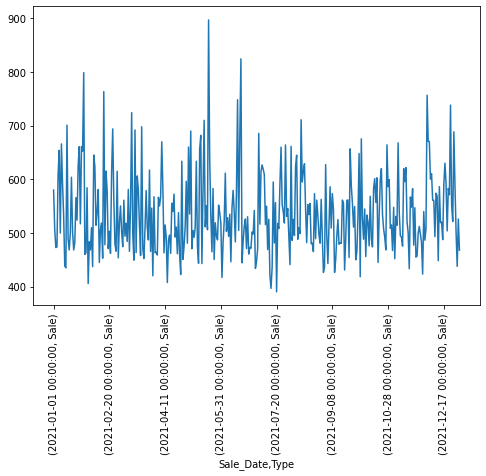

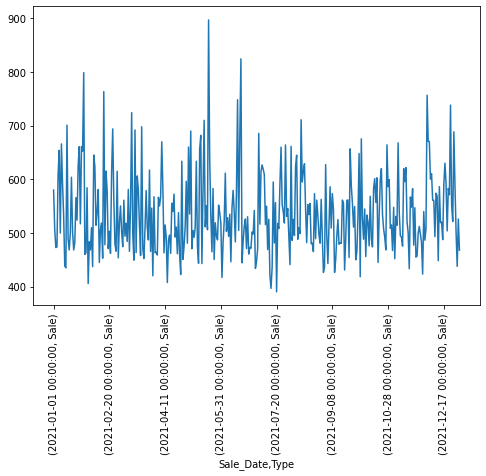

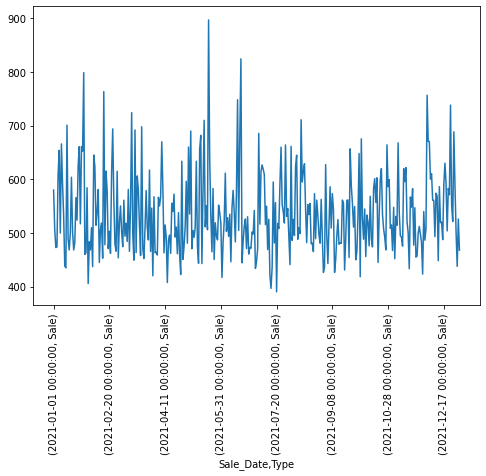

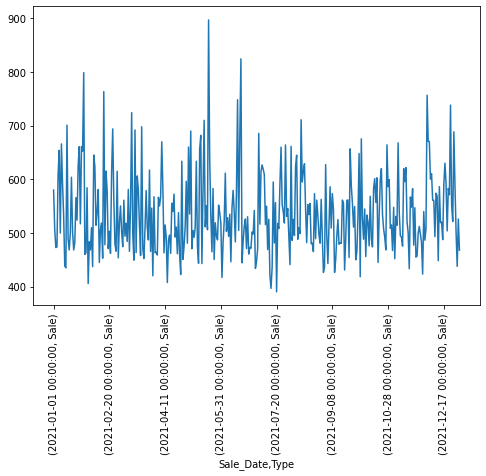

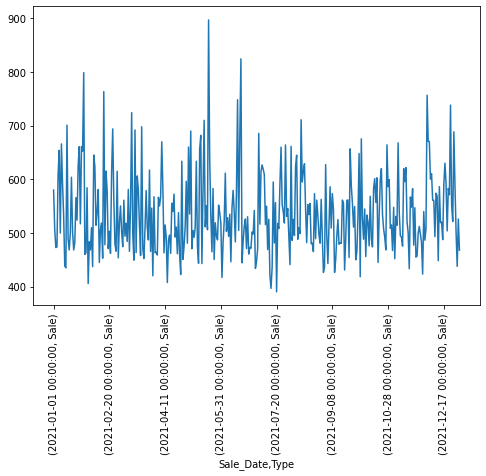

In [90]:
high_risk_list = ['1666','1253','2065','2116','2547']

for risk in high_risk_list:
    customer_df(df, risk)

#customer_df(df, '1666')